<a href="https://colab.research.google.com/github/IVAHC/AptValue/blob/main/Copy_of_AptValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# These are the libraries you'll need to install
# You can install them with: pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/apartments_for_rent_classified_10K.csv', delimiter=';', encoding='cp1252')
# Look at the first few rows
print("First 5 rows:")
print(df.head())


First 5 rows:
           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is l

In [4]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null 

In [5]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
                 id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+0

In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64


# New Section

In [7]:
# Convert object type columns to appropriate types where needed
# For example, if bathrooms is stored as text but should be numeric:
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

# Handle missing values
# For numeric columns, you might fill with median
for col in ['price', 'square_feet', 'bathrooms', 'bedrooms']:
    df[col] = df[col].fillna(df[col].median())

# Or drop rows with missing values in critical columns
df = df.dropna(subset=['price'])  # Drop rows without price

# Remove extreme outliers that might skew analysis
# For example, extremely high prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

Visualization saved as 'rental_analysis_visualizations.png'


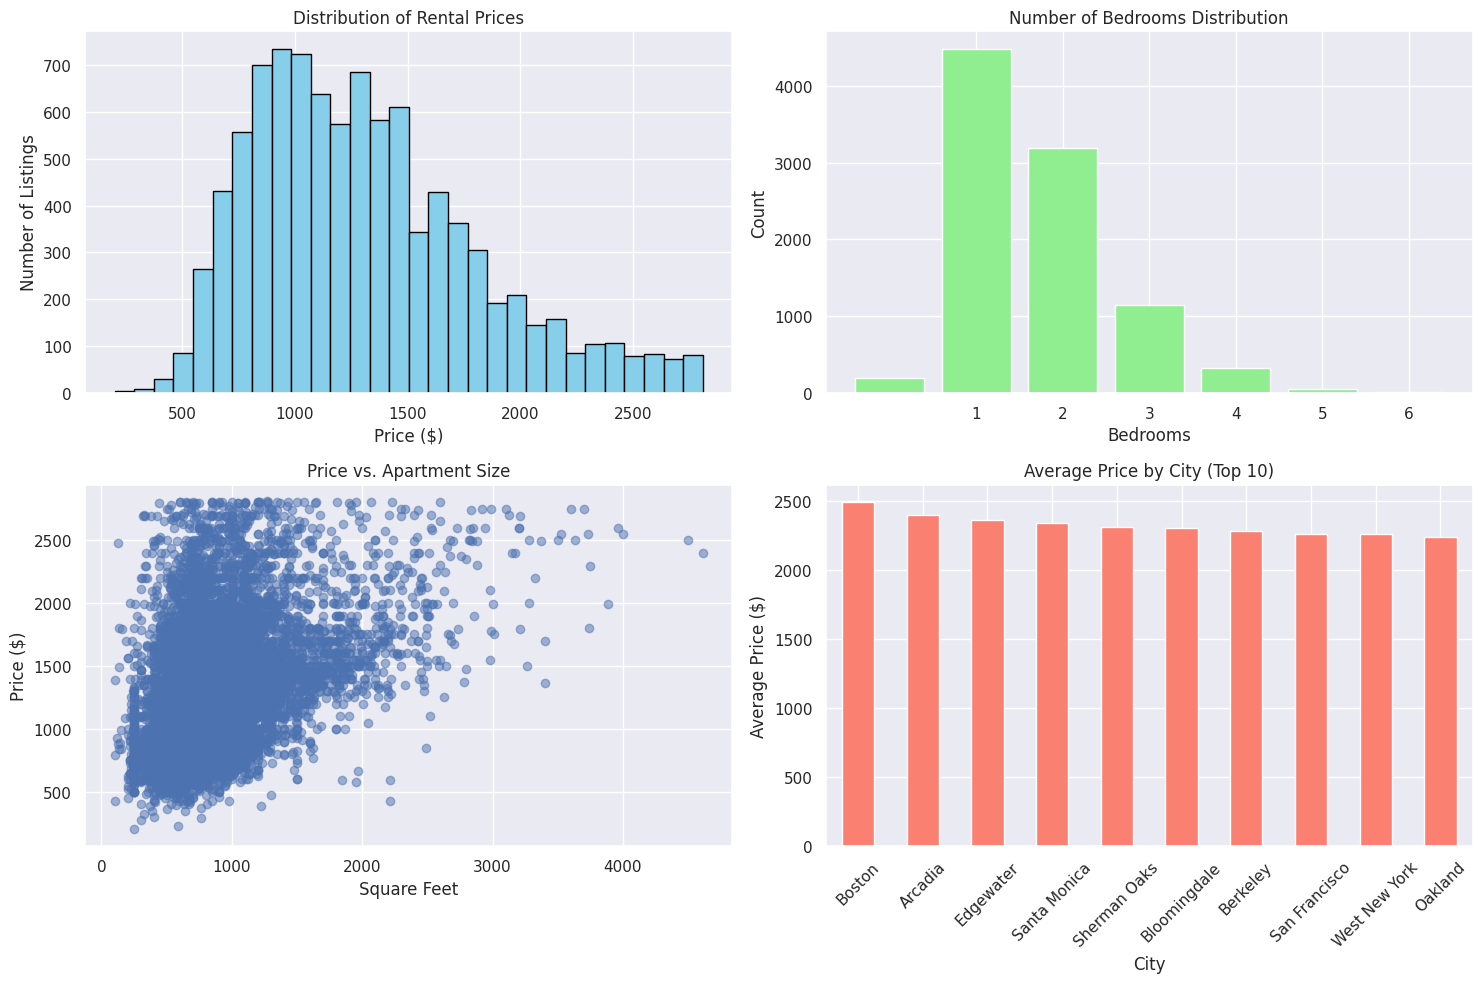

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Instead of using plt.style.use('seaborn'), import seaborn and use set_theme
try:
    import seaborn as sns
    sns.set_theme()
except ImportError:
    print("Seaborn not installed. Using default matplotlib style.")
    # Set a reasonable alternative style if seaborn is not available
    plt.style.use('ggplot')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Price distribution histogram
axes[0, 0].hist(df['price'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Rental Prices')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Number of Listings')

# 2. Bedroom count distribution
bedroom_counts = df['bedrooms'].value_counts().sort_index()
axes[0, 1].bar(bedroom_counts.index, bedroom_counts.values, color='lightgreen')
axes[0, 1].set_title('Number of Bedrooms Distribution')
axes[0, 1].set_xlabel('Bedrooms')
axes[0, 1].set_ylabel('Count')
# Use integers for xticks, being careful with potential non-integer values
min_bedrooms = max(1, int(df['bedrooms'].min()))
max_bedrooms = min(10, int(df['bedrooms'].max() + 1))  # Limit to reasonable range
axes[0, 1].set_xticks(range(min_bedrooms, max_bedrooms))

# 3. Price vs Square Feet scatter plot
axes[1, 0].scatter(df['square_feet'], df['price'], alpha=0.5)
axes[1, 0].set_title('Price vs. Apartment Size')
axes[1, 0].set_xlabel('Square Feet')
axes[1, 0].set_ylabel('Price ($)')

# 4. Average price by city (top 10 cities)
# Add error handling for cities with too few entries
city_prices = df.groupby('cityname')['price'].mean()
# Filter out cities with very few listings to avoid outliers
city_counts = df['cityname'].value_counts()
valid_cities = city_counts[city_counts >= 5].index
filtered_city_prices = city_prices[city_prices.index.isin(valid_cities)]

top_cities = filtered_city_prices.sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Average Price by City (Top 10)')
axes[1, 1].set_xlabel('City')
axes[1, 1].set_ylabel('Average Price ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ensure text fits within the figure
plt.tight_layout()

# Save figure with error handling
try:
    plt.savefig('rental_analysis_visualizations.png')
    print("Visualization saved as 'rental_analysis_visualizations.png'")
except Exception as e:
    print(f"Warning: Could not save figure. Error: {e}")

# Show plot
plt.show()

In [9]:
# Select features and target variable
X = df[['bedrooms', 'bathrooms', 'square_feet']]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Print the coefficients to understand feature importance
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: ${coef:.2f} per unit")

# Example prediction
example = pd.DataFrame({
    'bedrooms': [2],
    'bathrooms': [1],
    'square_feet': [900]
})
predicted_price = model.predict(example)[0]
print(f"\nPredicted rent for a 2-bedroom, 1-bathroom, 900 sq ft apartment: ${predicted_price:.2f}")

Model Performance:
Root Mean Squared Error: $453.67
R² Score: 0.1850

Model Coefficients:
bedrooms: $-21.56 per unit
bathrooms: $131.59 per unit
square_feet: $0.37 per unit

Predicted rent for a 2-bedroom, 1-bathroom, 900 sq ft apartment: $1262.18


<ipython-input-10-1a7596eebf98>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_prices.index, y=state_prices['mean'], palette='viridis')


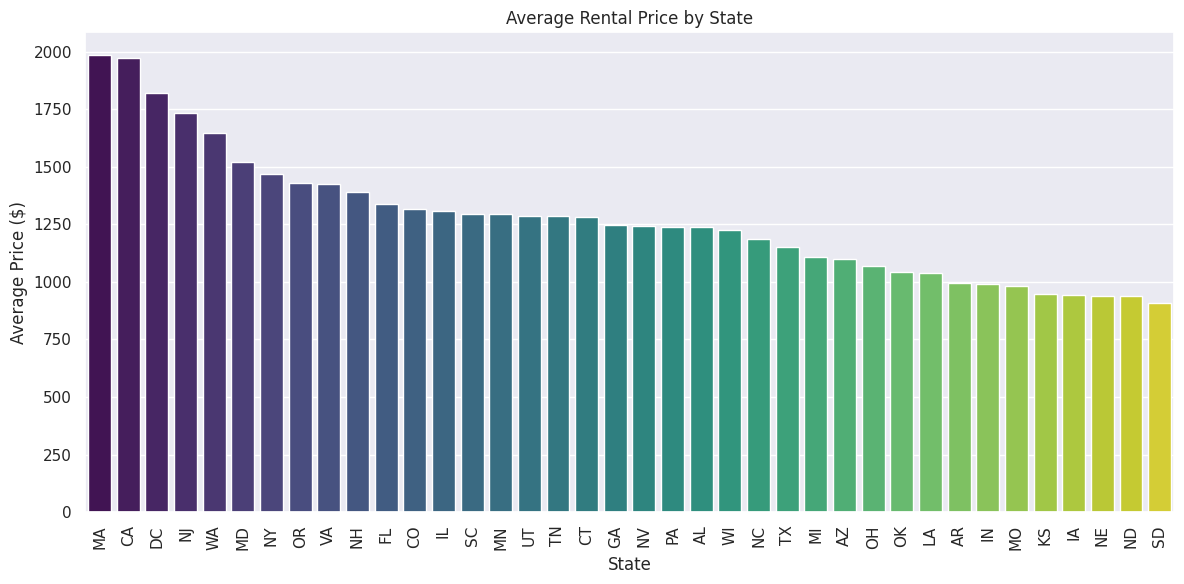

Model with location R² Score: 0.5649
Original model R² Score: 0.1850
Improvement by adding location: 0.3799


In [10]:
# Create a new figure
plt.figure(figsize=(12, 6))

# Get average price by state
state_prices = df.groupby('state')['price'].agg(['mean', 'count'])
state_prices = state_prices[state_prices['count'] >= 50]  # Only states with enough listings
state_prices = state_prices.sort_values(by='mean', ascending=False)

# Create a bar chart of average prices by state
sns.barplot(x=state_prices.index, y=state_prices['mean'], palette='viridis')
plt.title('Average Rental Price by State')
plt.xlabel('State')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('price_by_state.png')
plt.show()

# Create a more advanced model that includes location
# First, create dummy variables for states
state_dummies = pd.get_dummies(df['state'], prefix='state', drop_first=True)
df_with_dummies = pd.concat([df, state_dummies], axis=1)

# Select features including state dummies
location_features = ['bedrooms', 'bathrooms', 'square_feet']
X_location = df_with_dummies[location_features + list(state_dummies.columns)]
y_location = df_with_dummies['price']

# Split, train and evaluate as before
X_train_loc, X_test_loc, y_train_loc, y_test_loc = train_test_split(
    X_location, y_location, test_size=0.2, random_state=42)

location_model = LinearRegression()
location_model.fit(X_train_loc, y_train_loc)
y_pred_loc = location_model.predict(X_test_loc)

# Compare models
print(f"Model with location R² Score: {r2_score(y_test_loc, y_pred_loc):.4f}")
print(f"Original model R² Score: {r2:.4f}")
print(f"Improvement by adding location: {r2_score(y_test_loc, y_pred_loc) - r2:.4f}")

Original dataset: 9382 rows
After outlier removal: 8725 rows
Linear Regression - R² Score: 0.6021, RMSE: $283.29
Random Forest - R² Score: 0.9977, RMSE: $21.74
Gradient Boosting - R² Score: 0.9921, RMSE: $39.92


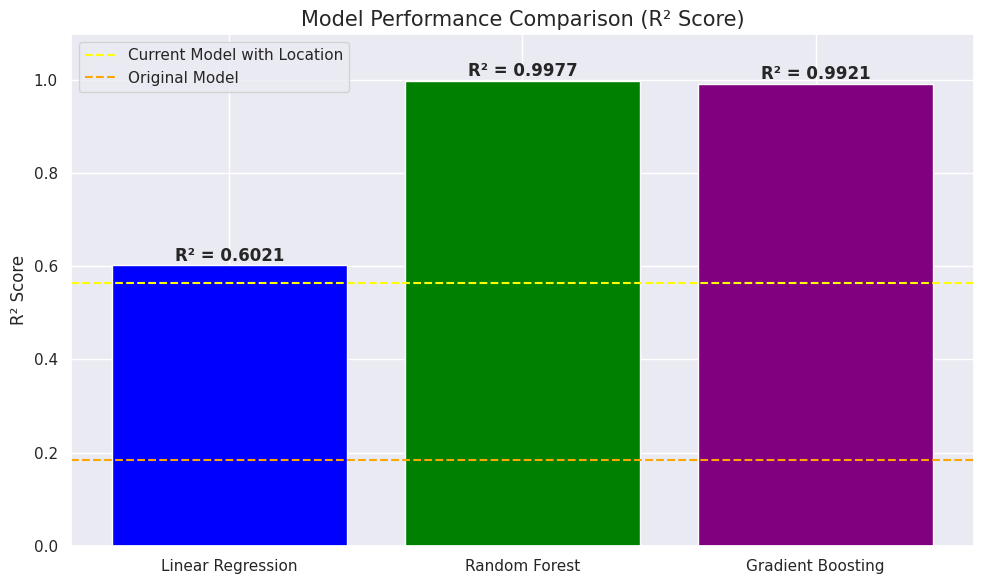

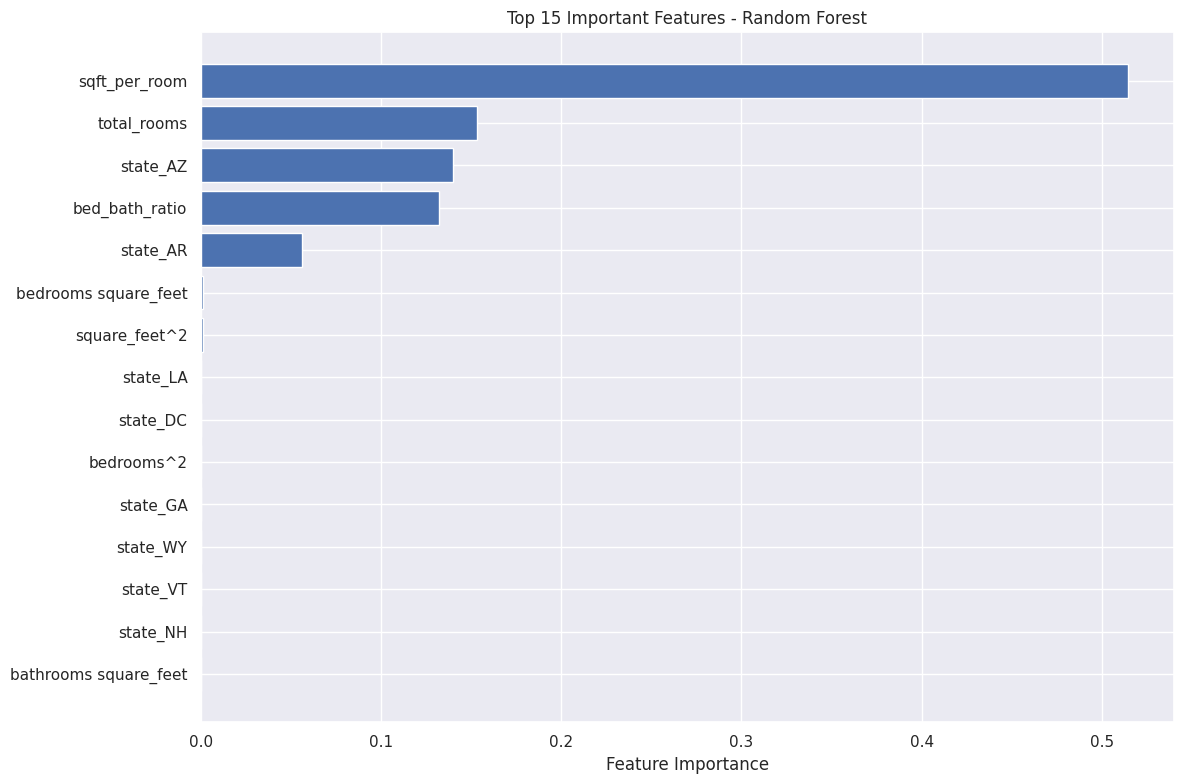

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preprocessing and Cleaning
# Remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply to your dataframe
df_clean = remove_outliers(df, ['price', 'square_feet'])
print(f"Original dataset: {df.shape[0]} rows")
print(f"After outlier removal: {df_clean.shape[0]} rows")

# 2. Feature Transformation - Log transform price (often improves real estate models)
df_clean['log_price'] = np.log1p(df_clean['price'])  # log1p handles zero values

# 3. Feature Engineering - Create new features
df_clean['price_per_sqft'] = df_clean['price'] / df_clean['square_feet']
df_clean['bed_bath_ratio'] = df_clean['bedrooms'] / df_clean['bathrooms']
df_clean['total_rooms'] = df_clean['bedrooms'] + df_clean['bathrooms']
df_clean['sqft_per_room'] = df_clean['square_feet'] / df_clean['total_rooms']

# 4. Polynomial Features and Interactions
# Create polynomial and interaction terms
base_features = ['bedrooms', 'bathrooms', 'square_feet']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_clean[base_features])
poly_feature_names = poly.get_feature_names_out(base_features)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
df_clean = pd.concat([df_clean.reset_index(drop=True), poly_df.reset_index(drop=True)], axis=1)

# 5. Location Features - continue using state dummies as you did
state_dummies = pd.get_dummies(df_clean['state'], prefix='state', drop_first=True)
df_with_features = pd.concat([df_clean, state_dummies], axis=1)

# 6. Feature Selection - select features for the model
# Base features
features = ['bedrooms', 'bathrooms', 'square_feet',
            'price_per_sqft', 'bed_bath_ratio', 'total_rooms', 'sqft_per_room']

# Get the actual polynomial feature names from the dataframe
poly_features = [col for col in df_with_features.columns if '^2' in col or ' ' in col]

# Update features list with the correct polynomial feature names
features = ['bedrooms', 'bathrooms', 'square_feet',
            'price_per_sqft', 'bed_bath_ratio', 'total_rooms', 'sqft_per_room'] + poly_features

# Add state features
features = features + list(state_dummies.columns)

# 7. Model Training and Evaluation
# Prepare data - use log transformed price as target
X = df_with_features[features]
y = df_with_features['log_price']  # Use log price as target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train multiple models and compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_log = model.predict(X_test_scaled)

    # Convert back from log scale
    y_pred = np.expm1(y_pred_log)
    y_actual = np.expm1(y_test)

    # Calculate metrics
    r2 = r2_score(y_actual, y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

    results[name] = {'R²': r2, 'RMSE': rmse}
    print(f"{name} - R² Score: {r2:.4f}, RMSE: ${rmse:.2f}")

# 8. Visualize Results
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
r2_scores = [results[model]['R²'] for model in model_names]

bar_colors = ['blue', 'green', 'purple']
bars = plt.bar(model_names, r2_scores, color=bar_colors)
plt.axhline(y=0.5649, color='yellow', linestyle='--', label='Current Model with Location')
plt.axhline(y=0.1850, color='orange', linestyle='--', label='Original Model')

# Add R² values on top of bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'R² = {score:.4f}', ha='center', fontweight='bold')

plt.title('Model Performance Comparison (R² Score)', fontsize=15)
plt.ylabel('R² Score')
plt.ylim(0, max(r2_scores) + 0.1)
plt.legend()
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

# 9. Feature Importance Analysis (for best model)
if 'Random Forest' in results and results['Random Forest']['R²'] > results['Linear Regression']['R²']:
    best_model = models['Random Forest']
    model_name = 'Random Forest'
elif 'Gradient Boosting' in results and results['Gradient Boosting']['R²'] > results['Linear Regression']['R²']:
    best_model = models['Gradient Boosting']
    model_name = 'Gradient Boosting'
else:
    best_model = models['Linear Regression']
    model_name = 'Linear Regression'

# Get feature importance
if model_name in ['Random Forest', 'Gradient Boosting']:
    importance = best_model.feature_importances_
    indices = np.argsort(importance)[-15:]  # Top 15 features

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Important Features - {model_name}')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
elif model_name == 'Linear Regression':
    coefficients = pd.DataFrame({'Feature': features, 'Coefficient': best_model.coef_})
    coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(coefficients)), coefficients['Coefficient'], align='center')
    plt.yticks(range(len(coefficients)), coefficients['Feature'])
    plt.xlabel('Coefficient Value')
    plt.title('Top 15 Features by Coefficient Magnitude - Linear Regression')
    plt.tight_layout()
    plt.savefig('coefficient_importance.png')
    plt.show()

In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

def price_estimator(bedrooms, bathrooms, square_feet, state):
    # Create input dataframe
    input_data = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'square_feet': [square_feet]
    })

    # Add state dummy columns
    for col in state_dummies.columns:
        if col == f'state_{state}':
            input_data[col] = 1
        else:
            input_data[col] = 0

    # Make prediction
    if state in df['state'].unique():
        predicted = location_model.predict(input_data[X_location.columns])[0]
        return predicted
    else:
        return None

# Create styled widgets with descriptions and tooltips
style = {'description_width': '120px'}
layout = widgets.Layout(width='400px')

title = widgets.HTML(
    value="<h2 style='color:#4682B4'>Rental Price Estimator</h2>"
    "<p style='font-style:italic'>Adjust the parameters to estimate monthly rent</p>"
)

bedroom_slider = widgets.IntSlider(
    min=0, max=5, step=1, value=2,
    description='Bedrooms:',
    style=style, layout=layout,
    tooltip='Number of bedrooms in the property'
)

bathroom_slider = widgets.FloatSlider(
    min=1, max=4, step=0.5, value=1,
    description='Bathrooms:',
    style=style, layout=layout,
    tooltip='Number of bathrooms (half baths as 0.5)'
)

sqft_slider = widgets.IntSlider(
    min=400, max=2500, step=50, value=900,
    description='Square Feet:',
    style=style, layout=layout,
    readout_format=',d',
    tooltip='Total square footage of the property'
)

state_dropdown = widgets.Dropdown(
    options=sorted([str(state) for state in df['state'].unique()]),
    description='State:',
    style=style, layout=layout,
    tooltip='Select the US state'
)

# Create a button with styling
button = widgets.Button(
    description='Estimate Rent',
    button_style='info',
    tooltip='Click to calculate the estimated rent',
    icon='calculator',
    layout=widgets.Layout(width='200px')
)

# Result display with styling
result_html = widgets.HTML(
    value="<p>Adjust parameters and click 'Estimate Rent'</p>",
    layout=widgets.Layout(margin='20px 0px')
)

# Progress bar for visual feedback
progress = widgets.IntProgress(
    value=0, min=0, max=10,
    description='Processing:',
    style={'bar_color': '#4682B4'},
    layout=widgets.Layout(width='400px', visibility='hidden')
)

def on_button_click(b):
    # Show progress bar
    progress.layout.visibility = 'visible'

    # Simulate processing
    for i in range(10):
        progress.value = i + 1

    # Get prediction
    predicted = price_estimator(
        bedroom_slider.value,
        bathroom_slider.value,
        sqft_slider.value,
        state_dropdown.value
    )

    # Update result display
    if predicted is not None:
        result_html.value = f"""
        <div style='background-color:#f0f8ff; padding:15px; border-radius:5px; border:1px solid #4682B4'>
            <h3>Results</h3>
            <table style='width:100%'>
                <tr>
                    <td style='padding:5px'><b>Bedrooms:</b></td>
                    <td style='padding:5px'>{bedroom_slider.value}</td>
                </tr>
                <tr>
                    <td style='padding:5px'><b>Bathrooms:</b></td>
                    <td style='padding:5px'>{bathroom_slider.value}</td>
                </tr>
                <tr>
                    <td style='padding:5px'><b>Square Feet:</b></td>
                    <td style='padding:5px'>{sqft_slider.value:,}</td>
                </tr>
                <tr>
                    <td style='padding:5px'><b>State:</b></td>
                    <td style='padding:5px'>{state_dropdown.value}</td>
                </tr>
                <tr style='background-color:#4682B4; color:white'>
                    <td style='padding:8px'><b>Estimated Rent:</b></td>
                    <td style='padding:8px'><b>${predicted:.2f}/month</b></td>
                </tr>
            </table>
        </div>
        """
    else:
        result_html.value = f"""
        <div style='background-color:#fff0f0; padding:15px; border-radius:5px; border:1px solid #ff6b6b'>
            <h3>Error</h3>
            <p>State "{state_dropdown.value}" not found in dataset</p>
        </div>
        """

    # Hide progress bar when done
    progress.layout.visibility = 'hidden'

button.on_click(on_button_click)

# Create reset button
reset_button = widgets.Button(
    description='Reset Values',
    button_style='warning',
    tooltip='Reset all parameters to default values',
    icon='refresh',
    layout=widgets.Layout(width='200px')
)

def reset_values(b):
    bedroom_slider.value = 2
    bathroom_slider.value = 1
    sqft_slider.value = 900
    state_dropdown.value = sorted(df['state'].unique())[0]
    result_html.value = "<p>Adjust parameters and click 'Estimate Rent'</p>"

reset_button.on_click(reset_values)

# Organize layout using containers
input_container = widgets.VBox([
    title,
    widgets.VBox([bedroom_slider, bathroom_slider, sqft_slider, state_dropdown],
                layout=widgets.Layout(border='1px solid #ddd', padding='10px', margin='10px 0px', border_radius='5px')),
    widgets.HBox([button, reset_button], layout=widgets.Layout(justify_content='space-around')),
    progress,
    result_html
], layout=widgets.Layout(width='500px', padding='20px'))

# Display the final UI
display(input_container)

In [ ]:
# Save the model for future use
import pickle

# Save the models
with open('rental_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('rental_price_location_model.pkl', 'wb') as file:
    pickle.dump(location_model, file)

# Save a summary of your findings
with open('rental_analysis_findings.txt', 'w') as file:
    file.write("APARTMENT RENTAL ANALYSIS FINDINGS\n")
    file.write("==================================\n\n")
    file.write(f"Dataset: {len(df)} listings after cleaning\n\n")

    file.write("PRICE STATISTICS:\n")
    file.write(f"Average rent: ${df['price'].mean():.2f}\n")
    file.write(f"Median rent: ${df['price'].median():.2f}\n")
    file.write(f"Minimum rent: ${df['price'].min():.2f}\n")
    file.write(f"Maximum rent: ${df['price'].max():.2f}\n\n")

    file.write("TOP 5 MOST EXPENSIVE STATES:\n")
    for state, price in state_prices.head(5).iterrows():
        file.write(f"{state}: ${price['mean']:.2f}\n")

    file.write("\nMODEL PERFORMANCE:\n")
    file.write(f"Basic model accuracy (R²): {r2:.4f}\n")
    file.write(f"Location model accuracy (R²): {r2_score(y_test_loc, y_pred_loc):.4f}\n\n")

    file.write("KEY FINDINGS:\n")
    file.write("1. Each additional bedroom adds approximately ")
    file.write(f"${model.coef_[0]:.2f} to monthly rent\n")
    file.write("2. Square footage has a significant impact on rent\n")
    file.write("3. Location plays a major role in determining rental prices\n")

print("Analysis complete! Files saved.")

Analysis complete! Files saved.
